Best number of clusters: 6
Silhouette score: 0.45205475380756527


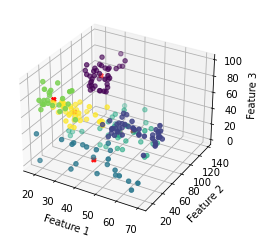

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Remove any missing values if necessary
data = data.dropna()

data['Gender'] = data['Gender'].astype('category').cat.codes

# Extract the features for clustering
features = data.iloc[:, 1:]  
#the features start from the first column

# Perform K-Means clustering
k_values = range(2, 11)  # Range of cluster numbers to try
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

# Determine the best number of clusters based on silhouette score
best_k = k_values[np.argmax(silhouette_scores)]

# Perform K-Means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(features)
labels = kmeans.labels_

# Visualize the clusters
#plt.scatter(features.iloc[:, 1], features.iloc[:, 2],features.iloc[:, 3], c=labels, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 3] ,marker='x', color='red', label='Centroids')
#plt.xlabel('Age')
#plt.ylabel('income')
#plt.zlabel("SS")
#plt.title('K-Means Clustering (k = {})'.format(best_k))
#plt.legend()
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three features
ax.scatter(features.iloc[:, 1], features.iloc[:, 2], features.iloc[:, 3], c=labels, cmap='viridis', marker='o')
ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', marker='X', s=20, label='Centroids')

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Print the silhouette score for the best number of clusters
print("Best number of clusters:", best_k)
print("Silhouette score:", silhouette_scores[np.argmax(silhouette_scores)])

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Remove any missing values if necessary
data = data.dropna()



data['Gender'] = data['Gender'].astype('category').cat.codes


print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


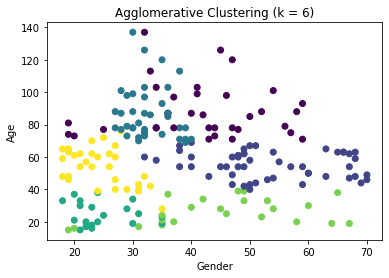

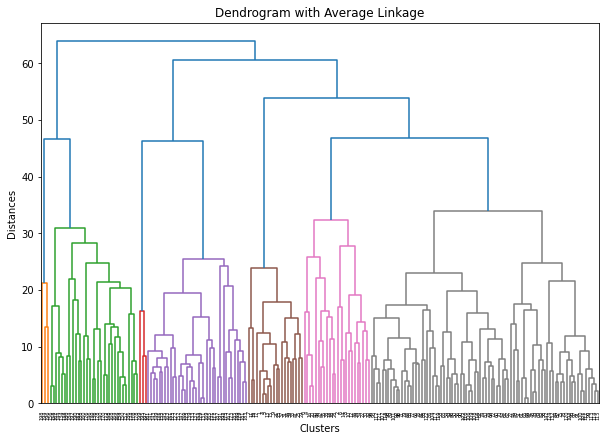

Best number of clusters: 6
Silhouette score: 0.4428008535928764


In [4]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Remove any missing values if necessary
data = data.dropna()

data['Gender'] = data['Gender'].astype('category').cat.codes

# Extract the features for clustering
features = data.iloc[:, 1:]  
#the features start from the first column

# Perform Agglomerative clustering
k_values = range(2, 11)  # Range of cluster numbers to try
silhouette_scores = []

for k in k_values:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative.fit_predict(features)
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

# Determine the best number of clusters based on silhouette score
best_k = k_values[np.argmax(silhouette_scores)]

# Perform Agglomerative clustering with the best number of clusters
agglomerative = AgglomerativeClustering(n_clusters=best_k)
labels = agglomerative.fit_predict(features)

# Visualize the clusters
plt.scatter(features.iloc[:, 1], features.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Agglomerative Clustering (k = {})'.format(best_k))
plt.show()

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with Average Linkage")
plt.xlabel('Clusters')
plt.ylabel('Distances')
dend = shc.dendrogram(shc.linkage(features, method='average'))
plt.show()

# Print the silhouette score for the best number of clusters
print("Best number of clusters:", best_k)
print("Silhouette score:", silhouette_scores[np.argmax(silhouette_scores)])


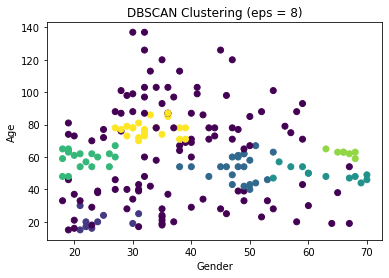

Best epsilon value: 8
Silhouette score: 0.007117647647714562


In [3]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Remove any missing values if necessary
data = data.dropna()

data['Gender'] = data['Gender'].astype('category').cat.codes

# Extract the features for clustering
features = data.iloc[:, 1:]  # The features start from the first column

# Perform DBSCAN clustering
eps_values = [7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8]  
# List of epsilon values to try
min_samples = 5  
# Minimum number of samples in a neighborhood to form a core point
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features)
    
    # Check if any clusters were formed
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(features, labels)
        silhouette_scores.append(silhouette_avg)

# Determine the best epsilon value based on silhouette score
best_eps = eps_values[np.argmax(silhouette_scores)]

# Perform DBSCAN clustering with the best epsilon value
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
labels = dbscan.fit_predict(features)

# Visualize the clusters
plt.scatter(features.iloc[:, 1], features.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('DBSCAN Clustering (eps = {})'.format(best_eps))
plt.show()

# Print the silhouette score for the best epsilon value
print("Best epsilon value:", best_eps)
print("Silhouette score:", silhouette_scores[np.argmax(silhouette_scores)])
